<h1>Классификация танков по 8 классам<br> из собранного мною датасета в 1680 картинок при помощи предобученных моделей НС: VGG19, NasnetMobile, Resnet50.

Картинки разного размера без предобработки.
Картинки загружены на Google Drive и размещены по 2 папкам:
1. Train - тут хранятся картинки для обучающей выборки.
2. Valid - для проверочной.<br>
- Уменьшу картинки до размера 224*224, т.к. предобученные модели работают с таким разрешением.<br>
- Построю НС с предобученными моделями НС и сравню их между собой.<br>
- Посмотрю как распознаются картинки танков (predict).<br>
- Сделаю вывод.

In [0]:
#Загрузка необходимых библиотек
from keras_preprocessing.image import ImageDataGenerator 
from __future__ import print_function, division
from keras.datasets import mnist, cifar10
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, MaxPooling2D, Embedding
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import sys
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile
from google.colab import drive

Using TensorFlow backend.


In [0]:
# Создаю функцию *plotAny* для отрисовки графиков доли верных ответов
# на обучающем и на проверочном наборах
def plotAny():
  plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

In [0]:
#Функция проверки обученной модели на картинках
def predictImage():
  img = image.load_img(img_path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x)
  prediction = np.argmax(prediction)
  print("Распознанный образ: ", prediction)
  print("Название распознанного образа: ", classes[prediction])

In [0]:
#Подгрузка google-drive, где хранятся картинки с танками
from google.colab import drive
drive.mount('/content/drive1')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive1


### Подготовка данных картинок 8ми классов при помощи библиотеки **ImageDataGenerator**

In [0]:
# Настройка test & train - генераторов для картинок
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающая выборка 8ми классов
train_generator = train_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# Проверочная выборка 8ми классов
validation_generator = test_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 1557 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [0]:
#Наименование классов танков
classes=['Ferdinand', 'KV-2', 'Priest', 'PZ-3', 'SU-85', 'T-34', 'T-90', 'Tigre']

In [0]:
#Настройка предобученного слоя VGG19
input_shape = (224, 224, 3)
vgg19_my = VGG19(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
vgg19_my.trainable = False

80142336/80134624 [==============================] - 6s 0us/step


#Предобученная модель VGG19

Epoch 1/20
  1/100 [..............................] - ETA: 4:57 - loss: 2.6097 - acc: 0.1250

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 124s 1s/step - loss: 1.3197 - acc: 0.5502 - val_loss: 1.0892 - val_acc: 0.7059
Epoch 2/20
100/100 [==============================] - 119s 1s/step - loss: 0.5738 - acc: 0.8267 - val_loss: 1.0995 - val_acc: 0.7243
Epoch 3/20
100/100 [==============================] - 123s 1s/step - loss: 0.3615 - acc: 0.9037 - val_loss: 1.1269 - val_acc: 0.7617
Epoch 4/20
100/100 [==============================] - 114s 1s/step - loss: 0.2394 - acc: 0.9444 - val_loss: 1.2638 - val_acc: 0.7500
Epoch 5/20
100/100 [==============================] - 117s 1s/step - loss: 0.1917 - acc: 0.9540 - val_loss: 1.0923 - val_acc: 0.7978
Epoch 6/20
100/100 [==============================] - 121s 1s/step - loss: 0.1659 - acc: 0.9586 - val_loss: 1.2908 - val_acc: 0.7930
Epoch 7/20
100/100 [==============================] - 122s 1s/step - loss: 0.1298 - acc: 0.9719 - val_loss: 1.2260 - val_acc: 0.7904
Epoch 8/20
100/100 [==============================] - 116s 1s/step - loss: 0.104

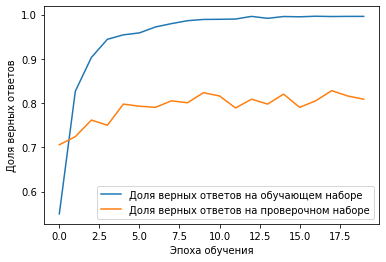

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

##Вывод: модель VGG19 обучилась хорошо 99%, на проверочной выборке показывает результат 80%

#Предобученная модель NASNetMobile

19996672/19993432 [==============================] - 1s 0us/step
Epoch 1/20
  2/100 [..............................] - ETA: 34:38 - loss: 3.6682 - accuracy: 0.0938

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 792s 8s/step - loss: 1.5935 - accuracy: 0.4981 - val_loss: 1.4313 - val_accuracy: 0.5257
Epoch 2/20
100/100 [==============================] - 119s 1s/step - loss: 0.7973 - accuracy: 0.7247 - val_loss: 1.7235 - val_accuracy: 0.5551
Epoch 3/20
100/100 [==============================] - 128s 1s/step - loss: 0.6037 - accuracy: 0.8011 - val_loss: 1.2662 - val_accuracy: 0.5312
Epoch 4/20
100/100 [==============================] - 128s 1s/step - loss: 0.4898 - accuracy: 0.8250 - val_loss: 1.4596 - val_accuracy: 0.4485
Epoch 5/20
100/100 [==============================] - 129s 1s/step - loss: 0.3954 - accuracy: 0.8628 - val_loss: 2.1740 - val_accuracy: 0.4485
Epoch 6/20
100/100 [==============================] - 130s 1s/step - loss: 0.3522 - accuracy: 0.8767 - val_loss: 1.2550 - val_accuracy: 0.5664
Epoch 7/20
100/100 [==============================] - 125s 1s/step - loss: 0.3179 - accuracy: 0.8933 - val_loss: 1.8723 - val_accuracy: 0.5147
Epoch 8/20

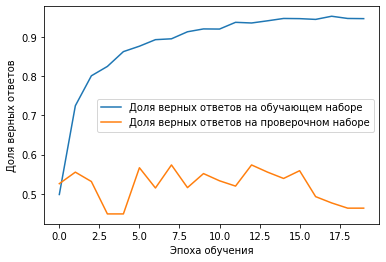

In [0]:
input_shape = (224, 224, 3)
NASNetMobile_my = NASNetMobile(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
NASNetMobile_my.trainable = False

model = Sequential()
model.add(NASNetMobile_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

##Модель NASNetMobile обучилась хорошо - 95%, но на проверочной выборке результат неудовлетворительный - 46%

#Предобученная модель Resnet50

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 191s 2s/step - loss: 1.0807 - accuracy: 0.7700 - val_loss: 3.4438 - val_accuracy: 0.1140
Epoch 2/20
100/100 [==============================] - 166s 2s/step - loss: 0.1142 - accuracy: 0.9644 - val_loss: 4.1213 - val_accuracy: 0.1434
Epoch 3/20
100/100 [==============================] - 167s 2s/step - loss: 0.1004 - accuracy: 0.9733 - val_loss: 3.6449 - val_accuracy: 0.1094
Epoch 4/20
100/100 [==============================] - 163s 2s/step - loss: 0.0815 - accuracy: 0.9821 - val_loss: 4.5633 - val_accuracy: 0.1471
Epoch 5/20
100/100 [==============================] - 164s 2s/step - loss: 0.0945 - accuracy: 0.9777 - val_loss: 2.7963 - val_accuracy: 0.1985
Epoch 6/20
100/100 [==============================] - 167s 2s/step - loss: 0.0562 - accuracy: 0.9852 - val_loss: 2.1918 - val_accuracy: 0.4531
Epoch 7/20
100/100 [==============================] - 165s 2s/step - loss: 0.0402 - accuracy: 0.9887 - val_loss: 1.5869 - val_accuracy: 0.7206
Epoch 8/20

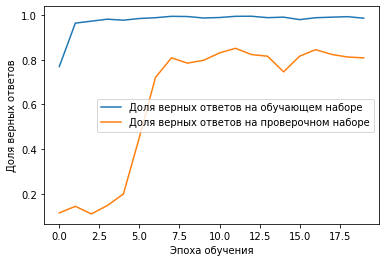

In [0]:
input_shape = (224, 224, 3)
resnet50_my = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
model = Sequential()
model.add(resnet50_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

#Вывод: модель Resnet50 была обучена на подходящих, к моей задаче, примерах и на проверочной выборке танков показывает хороший результат 80% 

# Predict

In [0]:
#Загрузка файлов для проверки распознавания обученной модели
files.upload()

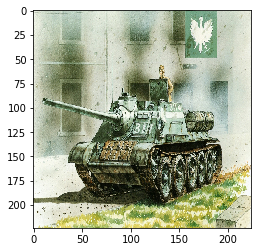

Распознанный образ:  4
Название распознанного образа:  SU-85


In [0]:
img_path = 'SU-85_2.jpg' #Путь к загруженной картинке
predictImage()

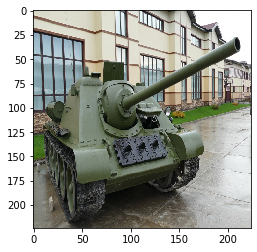

Распознанный образ:  5
Название распознанного образа:  T-34


In [0]:
img_path = 'SU-85_3.jpg'
predictImage()

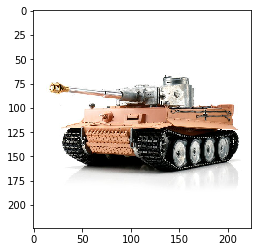

Распознанный образ:  7
Название распознанного образа:  Tigre


In [0]:
img_path = 'Tigre_1.jpg'
predictImage()

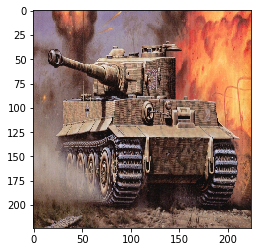

Распознанный образ:  7
Название распознанного образа:  Tigre


In [0]:
img_path = 'Tigre_5.jpg'
predictImage()

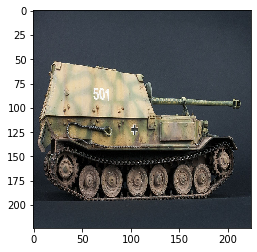

Распознанный образ:  0
Название распознанного образа:  Ferdinand


In [0]:
img_path = 'Ferdinant-1.jpg'
predictImage()

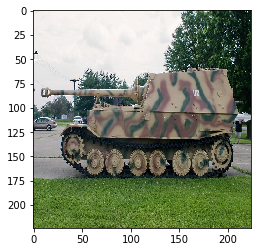

Распознанный образ:  0
Название распознанного образа:  Ferdinand


In [0]:
img_path = 'Ferdinant-2.jpg'
predictImage()

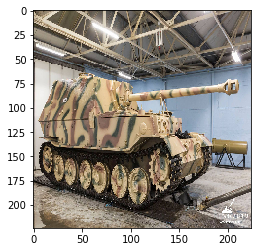

Распознанный образ:  5
Название распознанного образа:  T-34


In [0]:
img_path = 'Ferdinant-3.jpg'
predictImage()

#**Вывод:** модели **VGG19** и **Resnet50** показали хороший результат на проверочной выборке в 80% распознавания. Эти модели были обучены на подходящих, к моей задаче, картинках, выделили нужные "фичи" для хорошего распознавания моего датасета. Модель **NASNetMobile** с задачей не справилась результат менее 50% является неудовлетворительным. Для лучшего результат можно предобработать картинки в датасете для того, чтобы при изменении размера картинок они сохраняли свои пропорции.